# Практическая работа №1:  Основы анализа и моделирования социальных сетей
Выполнил студент гр. 0383 Парфенов Владислав. Вариант №9

## Цель работы
Целью данной практической работы является получение навыков работы с языком R, моделирования, визуализацией и анализированием сети.

## Основные теоретические положения
**Социоматрица** - матрица $X$ размерности $g \times g$, описывающая смежные узлы в сети.

**Размер сети** - количество акторов сети.

**Плотность сети** - доля имеющихся связей по отношению к макисмально возможному количеству связей.

Для ориентированных сетей: $\Delta = \displaystyle{\frac{L}{A_g^2}}$

Для неориентированных сетей: $\Delta = \displaystyle{\frac{L}{C^2_g}}$

**Компонента** - подгруппа, в котором все акторы связаны друг с другом прямо или косвенно.

**Диаметр полной сети** - наибольшая длина любого из кратчайших путей между всеми парами узлов.

**Коэффициент кластеризации** -  мера степени, в которой узлы графа стремятся сгруппироваться вместе.

**Степень узла** - число рёбер, инцидентных узлу $n_i$.

Средняя степень узлов: $\overline{d} = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} d(n_i)$

Дисперсия степени узлов: $S^2_D = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left(d(n_i) - \overline{d}\right)^2$

**Центральность по степени** - степень каждого актора.

Нормированная центральность по степени: $C'_D (n_i) = \displaystyle{\frac{d(n_i)}{g-1}}$

**Центральность по близости** - более важными узлами считаются узлы, наиболее близкие к остальным узлам сети.

Нормированная центральность по близости: $C'_C (n_i) = \displaystyle{\frac{g - 1}{\sum^g_{j = 1} d(n_i, n_j)}}$

**Центральность по последовательности** -- характеризует, насколько важную роль данный узел играет на пути "между" парами других узлов сети, в том смысле, что пути между другими узлами должны проходить через данный узел.

Нормированная центральность по посредничеству: $C'_B = \displaystyle{\frac{C_b (n_i)}{C_{g-1}^2}}$

**Центральность по информации** - обобщение понятия центральности по посредничеству, в котором все пути, между акторами с весами зависят от их длин, учитываются при подсчёте промежуточности.

**Централизация по степени:** $C_D = \displaystyle{\frac{\sum_{i = 1}^g (C'_D (n^*) - C'_D (n_i))}{(g-1)(g-2)}}$

**Централизация по близости**: $C_C = \displaystyle{\frac{\sum_{i = 1}^g (C'_C (n^*) - C'_C (n_i))}{(g-1)(g-2)/(2g - 3)}}$

**Централизация по посредничеству**: $C_B = \displaystyle{\frac{\sum_{i = 1}^g (C'_B (n^*) - C'_B (n_i))}{(g-1)}}$

**Централизация по информации** как дисперсия индексов инф. актора: $S_I^2 = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left( C'_I (n_i) - \overline{C_I} \right) ^2$

**Точка сочленения** - узел, при удалении которого увеличивается число компонент связности.

**Мост** - ребро, при удалении которого одна компонента разделяется на 2.

**Престиж** - мера, характеризующая актора с большим количеством входящих связей.

**Престиж по степени** - входящая степень каждого узла: $P_D (n_i) = d_I (n_i) = x_{+i}$

Нормированный престиж по степени: $P'_D (n_i) = \displaystyle{\frac{x_{+i}}{g - 1}}$

**Престиж по близости** - определяет, насколько все акторы близки к заданному по расстоянию до него.

$P_p (n_i) = \displaystyle{\frac{\# I_i / (g-1)}{\sum_{j: n_j \in I_i} \left( d(n_j, n_i) / \# I_i\right)}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Первым делом необходимо установить igraph.

In [14]:
install.packages("igraph")
install.packages("statnet")
library(igraph)
library(statnet)

Warning message:
"пакет ''igraph'' сейчас используется и не будет установлен"
Устанавливаю пакет в 'C:/Users/Владислав/AppData/Local/R/win-library/4.2'
(потому что 'lib' не определено)



пакет 'statnet' успешно распакован, MD5-суммы проверены

Скачанные бинарные пакеты находятся в
	C:\Users\Владислав\AppData\Local\Temp\RtmpCIFEmH\downloaded_packages


Загрузка требуемого пакета: tergm

Загрузка требуемого пакета: ergm

Загрузка требуемого пакета: network


'network' 1.18.0 (2022-10-05), part of the Statnet Project
* 'news(package="network")' for changes since last version
* 'citation("network")' for citation information
* 'https://statnet.org' for help, support, and other information



Присоединяю пакет: 'network'


Следующие объекты скрыты от 'package:igraph':

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute



'ergm' 4.2.3 (2022-10-02), part of the Statnet Project
* 'news(package="ergm")' for changes since last version
* 'citation("ergm")' for citation information
* 'https://statnet.org' for help, support, and other information


'ergm' 4 is a major update that introduces some backwards-incompatible
changes. Please type 'news(packag

1. Из файла florentine_business.csv (для нечётных вариантов)
и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [4]:
data <- read.table("florentine_business.csv", header=TRUE, sep = ',')


socio.matrix <- as.matrix(data)
socio.matrix

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 эле-
ментов списка рёбер.

In [5]:
edges <- get.edgelist(graph.adjacency(socio.matrix))
edges <- as_data_frame(simplify(graph_from_data_frame(edges, directed=FALSE)))
print(edges[c(1:5), c(1:2)])

       from         to
1 Barbadori Castellani
2 Barbadori     Ginori
3 Barbadori     Medici
4 Barbadori    Peruzzi
5  Bischeri   Guadagni


3. Присвоить имена столбцам и строкам социоматрицы (имена – пер-
вая строка в csv-файле после комментариев).

In [25]:
data <- read.table("florentine_business.csv", header=TRUE, sep = ',')


socio.matrix <- as.matrix(data)
g <- network(socio.matrix, directed=FALSE)
rownames(socio.matrix) <- network.vertex.names(g)
socio.matrix

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
Pazzi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


4. С помощью соответствующих функций по полученной социоматри-
це построить ненаправленную сеть. Объяснить параметры, переда-
ваемые в функцию.

In [26]:
gr <- graph_from_adjacency_matrix(socio.matrix, mode = "undirected")

Первым параметром передается социоматрица, вторым направленность графа, в данном случае ненаправленный.

Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

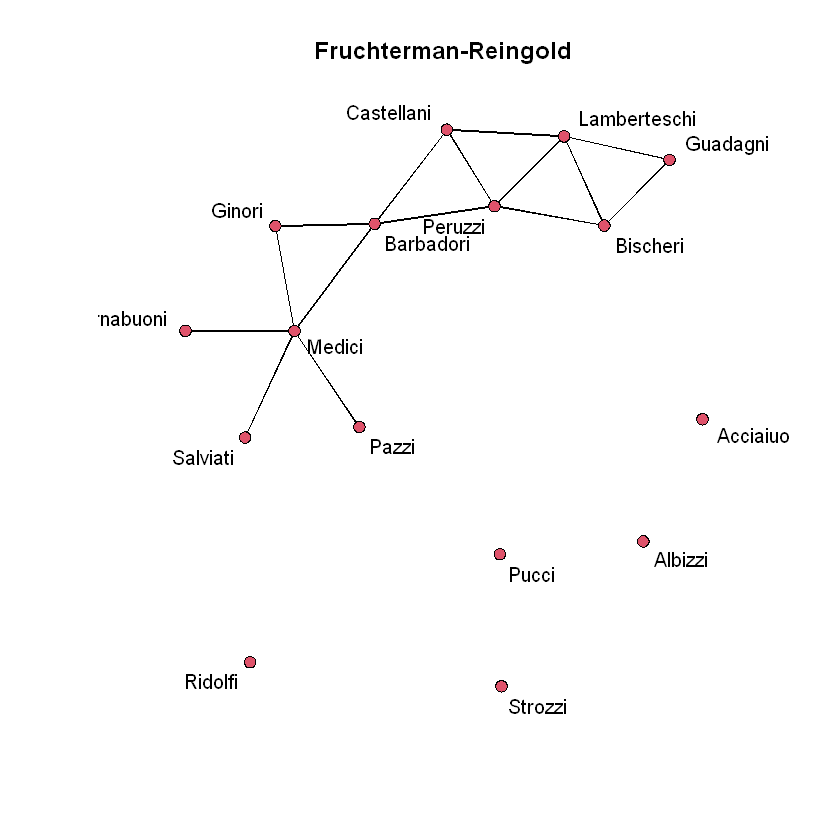

In [27]:
plot.network(g, 
     mode = "fruchtermanreingold",
     label = network.vertex.names(g),
     main = "Fruchterman-Reingold"
)

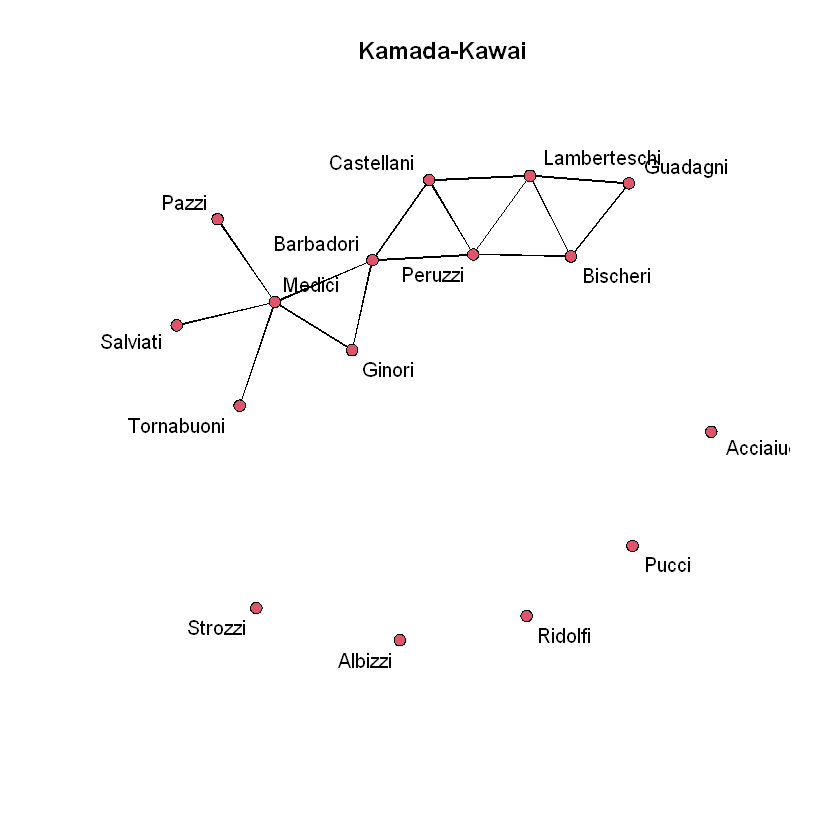

In [28]:
plot.network(g, 
             mode = "kamadakawai",
             label = network.vertex.names(g),
             main = "Kamada-Kawai"
)

Алгоритм Фрюхтермана–Рейнгольда рассчитывает силы притяжения и отталкивания каждой вершины графа, и пользуется только ими. 
Алгоритм Камада-Каваи на каждом шаге отталкивается от вершины, на которую действует наибольшая сила, а также сводит к минимуму энергию относительно неё.

6. Вывести «описательную сводку» сети.

In [30]:
print(summary(socio.matrix))

   Acciaiuoli    Albizzi    Barbadori       Bischeri        Castellani    
 Min.   :0    Min.   :0   Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0    1st Qu.:0   1st Qu.:0.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0    Median :0   Median :0.00   Median :0.0000   Median :0.0000  
 Mean   :0    Mean   :0   Mean   :0.25   Mean   :0.1875   Mean   :0.1875  
 3rd Qu.:0    3rd Qu.:0   3rd Qu.:0.25   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :0    Max.   :0   Max.   :1.00   Max.   :1.0000   Max.   :1.0000  
     Ginori         Guadagni      Lamberteschi      Medici      
 Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.00   1st Qu.:0.0000  
 Median :0.000   Median :0.000   Median :0.00   Median :0.0000  
 Mean   :0.125   Mean   :0.125   Mean   :0.25   Mean   :0.3125  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.25   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.000   Max.   :1.00   Max.   :1.0000  
     Pazzi          

7. Вычислить «пятичисловую сводку» сети:

In [38]:
gr <- graph_from_adjacency_matrix(socio.matrix, mode = "undirected")

cat("Размер сети: ", gorder(gr))
cat("\nПлотность сети с помощью r функции: ", edge_density(gr))
cat("\nПлотность сети вручную: ", gsize(gr)/choose(gorder(gr), 2))
cat("\nДиаметр сети: ", diameter(gr))
cat("\nЧисло компонент в сети: ", components(g))
cat("\nКоэффициент кластеризации: ", transitivity(gr))

Размер сети:  16
Плотность сети с помощью r функции:  0.125
Плотность сети вручную:  0.125
Диаметр сети:  5
Число компонент в сети:  6
Коэффициент кластеризации:  0.4166667

По поводу плотностей. Плотность была вычислена два раза, результат одинаковый, значит все корректно.
По взгляду в сети 6 компонент: 5 одиночных акторов и компонент, который содержит все связанные акторы. Результаты программы это подтвердили.
Диаметр высчитан правильно, действительно, например, максимальное кратчайщие расстояние - 5, это можно видеть на графике между вершинами Salviati и Guadagni.
Коэффициент кластеризации не такой большой, это сказывается из-за наличия изолированных акторов.

8. Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [39]:
cat("Средняя степень узлов: ", mean(igraph::degree(gr)))
cat("\nДисперсия: ", varience<-var(igraph::degree(gr)))

Средняя степень узлов:  1.875
Дисперсия:  3.05

Изолированные вершины сильно повлияли на среднюю степень узлов, тоже самое касается и дисперсии.

9. Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин:

In [41]:
#удалили изолированные вершины
new_matrix <- socio.matrix[!apply(socio.matrix == 0, 1, all), !apply(socio.matrix == 0, 1, all)]
e <- graph_from_adjacency_matrix(new_matrix, mode = "undirected")

e_order <- gorder(e)
Cd <- igraph::degree(e)

inverted_matrix <- solve(laplacian_matrix(e) + 1) 
trace <- sum(diag(inverted_matrix)) 
diag_elem_sum <- colSums(inverted_matrix) 
CI <- 1/(diag(inverted_matrix) + (trace - 2*diag_elem_sum)/e_order)

# результаты
CD_ni <- Cd / (e_order - 1)
CC_ni <- igraph::closeness(e, normalized = TRUE)
CB_ni <- igraph::betweenness(e, normalized = TRUE)
CI_ni <- CI / sum(CI)


centrality_table <- data.frame(
  ni = 1:e_order, # акторы
  CD_ni = CD_ni, # по степени 
  CC_ni = CC_ni, # по близости 
  CB_ni = CB_ni, # по посреднечеству 
  CI_ni = CI_ni # по информации
)

centrality_table


,ni,CD_ni,CC_ni,CB_ni,CI_ni
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Barbadori,1,0.4,0.5882353,0.55555556,0.12446815
Bischeri,2,0.3,0.4000000,0.05555556,0.08898359
Castellani,3,0.3,0.5000000,0.11111111,0.10457651
Ginori,4,0.2,0.4545455,0.00000000,0.09531249
Guadagni,5,0.2,0.3125000,0.00000000,0.07656303
Lamberteschi,6,0.4,0.4166667,0.13333333,0.09837087
Medici,7,0.5,0.5263158,0.53333333,0.11089878
Pazzi,8,0.1,0.3571429,0.00000000,0.06388631
Peruzzi,9,0.4,0.5263158,0.30000000,0.10916767


Выводы: по мерам централизации можно судить о расположение вершины в графе. Как видно из таблицы, Medici обладает самыми большими показателями меры центральности, а это значит, что она является наиболее влиятельная в графе.

10. Вычислить значение централизации для каждой меры. Сделать выводы.

In [55]:
cat("Централизация по степени: ", centralize(CD_ni, (e_order - 1) * (e_order - 2)))

cat("\nЦентрализация по близости: ", centralize(CC_ni, (e_order - 1) * (e_order - 2) / (2 * e_order - 3)))

cat("\nЦентрализация по посреднечеству: ", centralize(CB_ni, (e_order - 1)))

cat("\nЦентрализация по информации: ", var(CI_ni))

Централизация по степени:  0.02777778
Централизация по близости:  0.3535226
Централизация по посреднечеству:  0.4422222
Централизация по информации:  0.000452125

Выводы: значение централизации сильно зависит от той меры, относительно которой она считается.

11. Выявить точки сочленения и мосты сети. Подтвердить свои догад-
ки с помощью соответствующих функций (если их нет – реализуйте
их самостоятельно). Построить график сети, на котором выделены
точки сочленения и мосты.

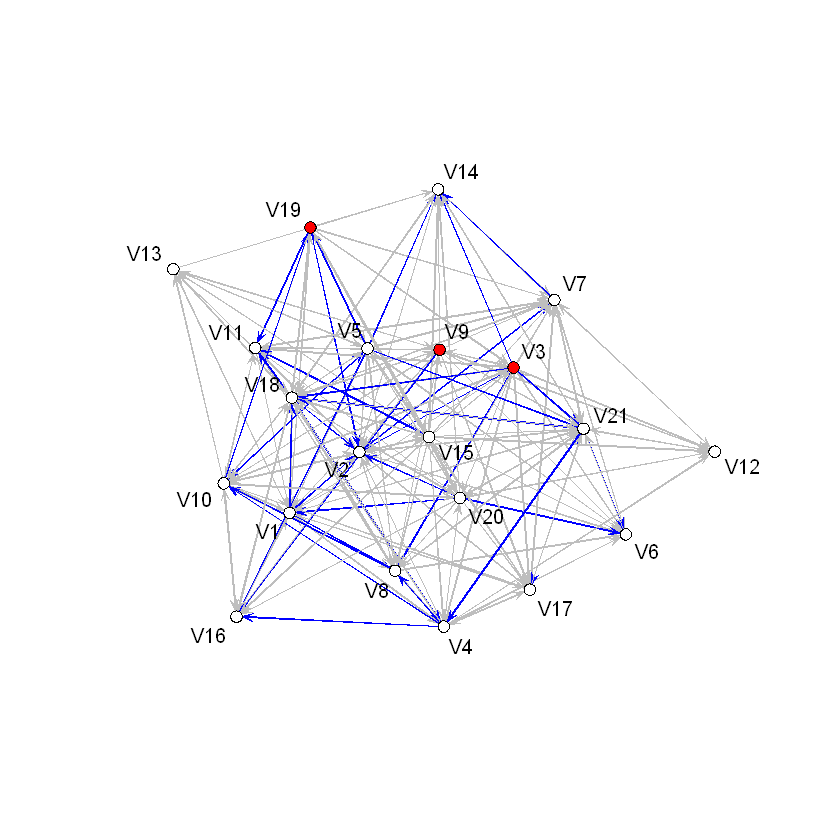

In [60]:
data <- read.table("florentine_business.csv", header=TRUE, sep = ',')


socio.matrix <- as.matrix(data)

gr <- graph_from_adjacency_matrix(socio.matrix, mode = "undirected")

art_points <- igraph::articulation_points(gr)
brg <- igraph::bridges(gr)

V(gr)$color <- "white"
E(gr)$color <- "grey"
E(gr)$color[brg] <- "blue"
V(gr)$color[art_points] <- "red"

plot(g, mode = "fruchtermanreingold", 
     label = network.vertex.names(g),
     vertex.col= V(gr)$color,
     label.col = "black", 
     edge.col = E(gr)$color)

Мосты выделены синим цветом, точки сочленения красным.

12. Выполнить пп. 2–8 для направленной сети из файла krackhardt_advice.csv
(для нечётных вариантов) и файла krackhardt_friendship.csv
(для чётных вариантов).

In [42]:
data <- read.table("krackhardt_advice.csv", sep = ',')


socio.matrix <- as.matrix(data)
socio.matrix

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


Присвоить имена столбцам и строкам социоматрицы (имена – пер-
вая строка в csv-файле после комментариев).

In [44]:
data <- read.table("krackhardt_advice.csv", header=FALSE, sep = ',')


socio.matrix <- as.matrix(data)
g <- network(socio.matrix, directed=TRUE)
rownames(socio.matrix) <- network.vertex.names(g)
socio.matrix

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
V1,0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
V2,0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V3,1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
V4,1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
V5,1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
V6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V7,0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
V8,0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
V9,1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
V10,1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


С помощью соответствующих функций по полученной социоматрице построить направленную сеть. Объяснить параметры, передаваемые в функцию.

In [45]:
gr <- graph_from_adjacency_matrix(socio.matrix, mode = "directed")

Принимает на вход социоматрицу и направленность графа, в данном случае направленный.

Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

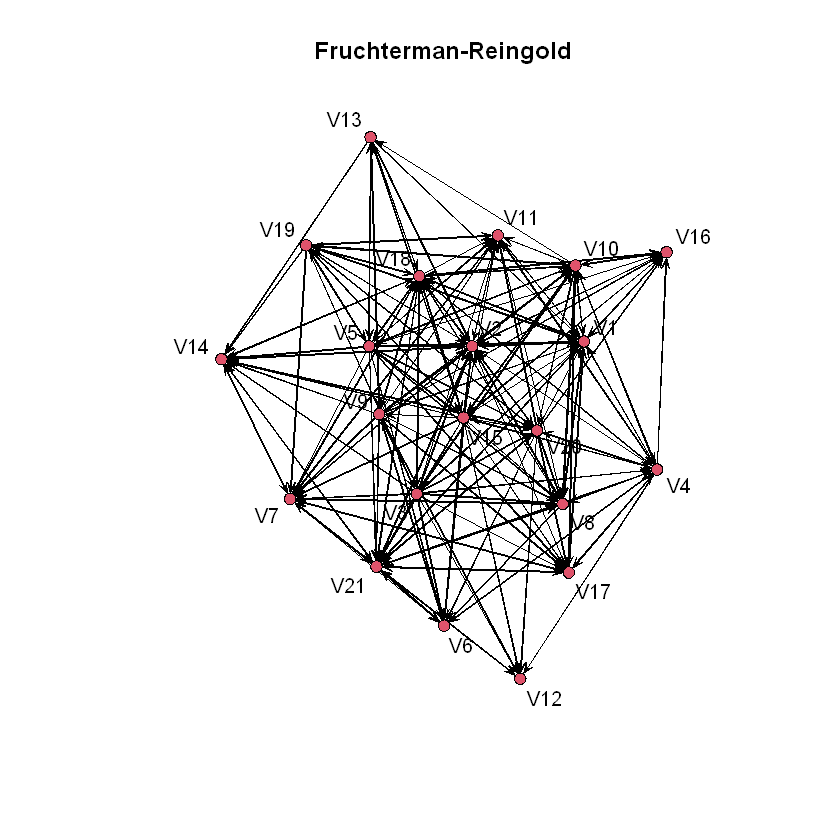

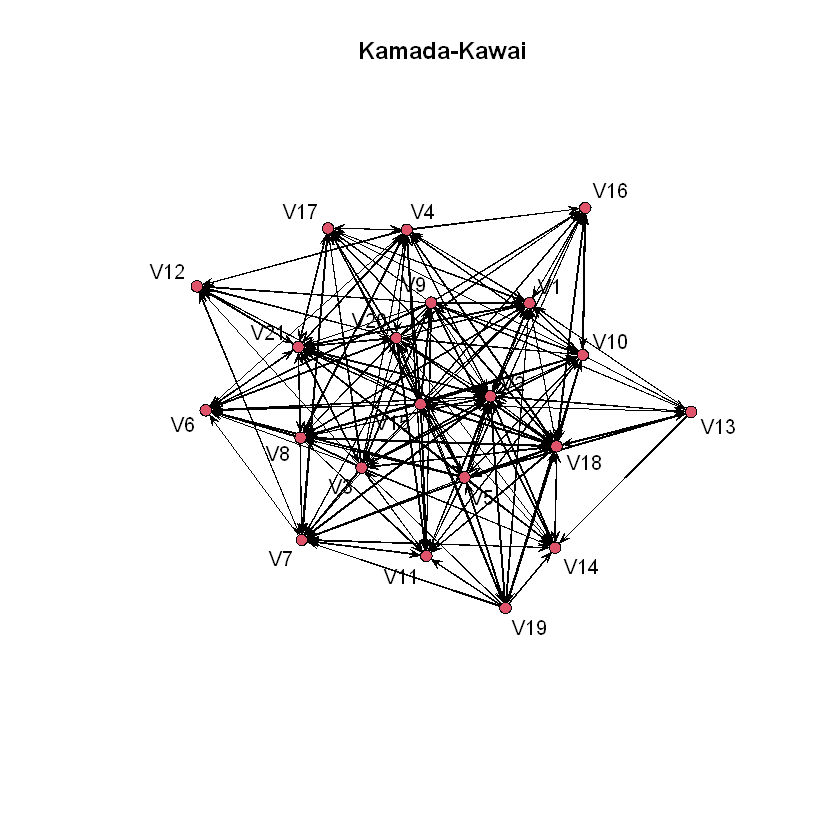

In [46]:
plot.network(g, 
             mode = "fruchtermanreingold",
             label = network.vertex.names(g),
             main = "Fruchterman-Reingold"
)

plot.network(g, 
             mode = "kamadakawai",
             label = network.vertex.names(g),
             main = "Kamada-Kawai"
)

In [ ]:
Вывести «описательную сводку» сети.

In [47]:
print(summary(socio.matrix))

       V1              V2               V3               V4       
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :1.000   Median :1.0000   Median :0.0000   Median :0.000  
 Mean   :0.619   Mean   :0.8571   Mean   :0.2381   Mean   :0.381  
 3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :1.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
       V5               V6               V7              V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :1.000   Median :0.0000  
 Mean   :0.2381   Mean   :0.4762   Mean   :0.619   Mean   :0.4762  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V9              V10              V11            

In [49]:
cat("\nРазмер сети: ", gorder(gr))
cat("\nПлотность сети ", edge_density(gr))
cat("\nДиаметр сети: ", diameter(gr))
cat("\n Число компонент в сети: ", components(g))
cat("\nКоэффициент кластеризации: ", transitivity(gr))


Размер сети:  21
Плотность сети  0.452381
Диаметр сети:  3
 Число компонент в сети:  1
Коэффициент кластеризации:  0.7345088

Вычислить среднюю степень узлов и дисперсию. 

In [53]:
cat("7. Вычислить среднюю степень узлов и дисперсию.")
cat("\nСредняя степень узлов сети: ", mean(igraph::degree(gr)))
cat("\n - in: ", mean(igraph::degree(gr, mode="in")))
cat("\n - out ", mean(igraph::degree(gr, mode="out")))
cat("\n\tДисперсия: ", varience<-var(igraph::degree(gr)))
cat("\n - in: ", var(igraph::degree(gr, mode="in")))
cat("\n - out: ", var(igraph::degree(gr, mode="out")))

7. Вычислить среднюю степень узлов и дисперсию.
Средняя степень узлов сети:  18.09524
 - in:  9.047619
 - out  9.047619
	Дисперсия:  32.19048
 - in:  16.54762
 - out:  29.74762

Также можно (и нужно) вставлять таблицы. [Удобный сайт для создания Markdown-таблиц.](https://www.tablesgenerator.com/markdown_tables "Markdown Tables generator")

Не забывайте проанализировать полученные результаты.

Заполнить таблицу для различных мер престижа

In [54]:
x_plus_i <- igraph::degree(gr, mode="in", normalized="true")
gr_order <- gorder(gr)

i <- 1
ls <- list()

for(vertex in V(gr)) {
  num_Ii <- length(subcomponent(gr, vertex)) - 1
  d_nj_ni <- distances(gr, v=vertex)
  ls[[i]] <- (num_Ii/(gr_order - 1))/(sum(d_nj_ni/num_Ii))
  i <- i + 1
}
result <- unlist(ls)


b <- data.frame(
  n_i = 1:gr_order,
  PD_ni = x_plus_i,
  PP_ni = result 
)

b

,n_i,PD_ni,PP_ni
,<int>,<dbl>,<dbl>
V1,1,0.65,0.8333333
V2,2,0.90,0.9523810
V3,3,0.25,0.8695652
V4,4,0.40,0.7692308
V5,5,0.25,0.8333333
V6,6,0.50,0.6666667
V7,7,0.65,0.7692308
V8,8,0.50,0.7692308
V9,9,0.20,0.8333333


Престиж по степени показывает, насколько много соседних вершин имеет вершина. Престиж по близости показывает, как все остальные вершины связаны с ней.

## Выводы

В ходе данной практической работы были получены практические знания по работе с сетями. Был изучен процесс моделирования, визуализации и анализа сетей. Были использованы пакеты igraph и statnet, что позволило упростить работу с сетями. Также были закреплены базовые навыки работы с языком R.